# <span style="color:#0F19C9">Contents</span>

- [Importing and loading data](#importing-and-loading-data)
- [Understanding data](#understanding-data)
- [Aisles Dataframe](#aisles-dataframe)
- [Department Dataframe](#departments-dataframe)
- [Orders Dataframe](#orders-dataframe)
- [Orders Products Prior Dataframes](#orders-products-prior-dataframes)
- [Orders Products Train Dataframes](#orders-products-train-dataframes)
- [Product Dataframe](#products-dataframe)
- [Analysis InterDataframes](#analysis-interdataframes)

# <span style="color:#0F19C9">Importing and loading data</span>

Before we start this notebook, we build an Excel File that can be found in the Data folder when we import main components of the MSFT financial statements, including Balance Sheet, Income Statement, Cash Flow Statement and some important Ratios from them. In the second spreadsheet, we keep only the concerning ones to the present analysis.

In [65]:
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mtick
from matplotlib import gridspec
import seaborn as sns

In [42]:
# Import my color palette
juan_colors = ['#101B4B', '#545E85', '#A3A8B2',
               '#E7E7E7', '#0F19C9', '#F6D673']

# Crear la paleta de colores personalizada
colors = [juan_colors[5], juan_colors[0]]
juan_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Setting plot font
plt.rc('font', family='Georgia', size=12)

In [43]:
df = pd.read_excel('../Data/msft_regression_data.xlsx', sheet_name='EBITDA_Model_Data')

# <span style="color:#0F19C9">Understanding data</span>

Even when it is expected, because the Excel file was build manually, we do not find any null value and any duplicates. So we can start with the basic analysis of the different variables to understand the actual size of our analysis.

In [44]:
# Print null and duplicated values
print(f'The original dataframe has {df.isna().sum().sum()} null values and {df.duplicated().sum()} duplicates')

The original dataframe has 0 null values and 0 duplicates


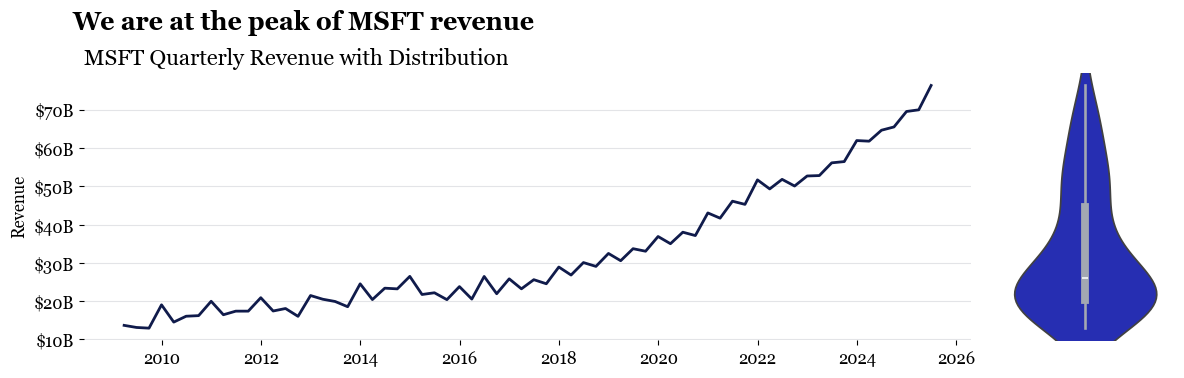

In [232]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
plt.suptitle('We are at the peak of MSFT revenue',
             x=0.067, y=0.94,
             ha='left', size=18,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['Revenue'], color=juan_colors[0], linewidth=2)
ax0.set_title('MSFT Quarterly Revenue with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Revenue')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['Revenue'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])

# Align the y-axis limits of both plots to ensure the grid aligns perfectly
ax1.set_ylim(ax0.get_ylim())

ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

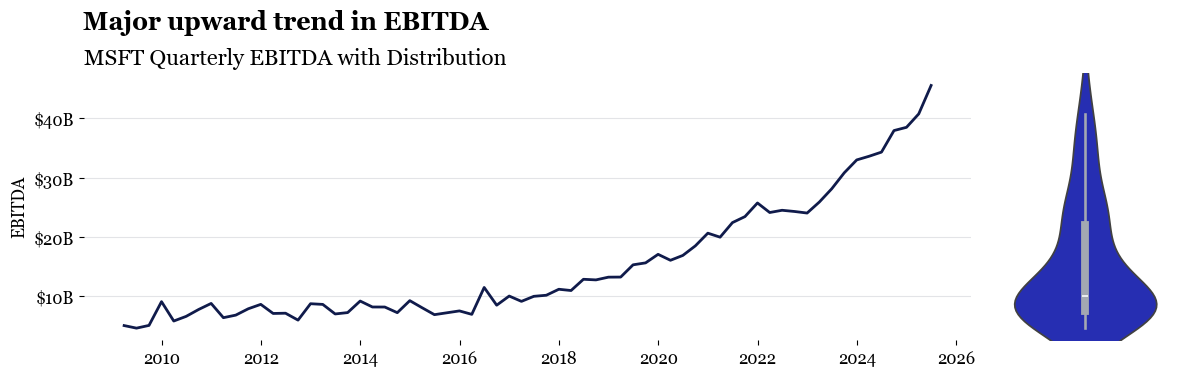

In [233]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
plt.suptitle('Major upward trend in EBITDA',
             x=0.076, y=0.94,
             ha='left', size=18,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['EBITDA'], color=juan_colors[0], linewidth=2)
ax0.set_title('MSFT Quarterly EBITDA with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('EBITDA')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['EBITDA'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])

# Align the y-axis limits of both plots to ensure the grid aligns perfectly
ax1.set_ylim(ax0.get_ylim())

ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

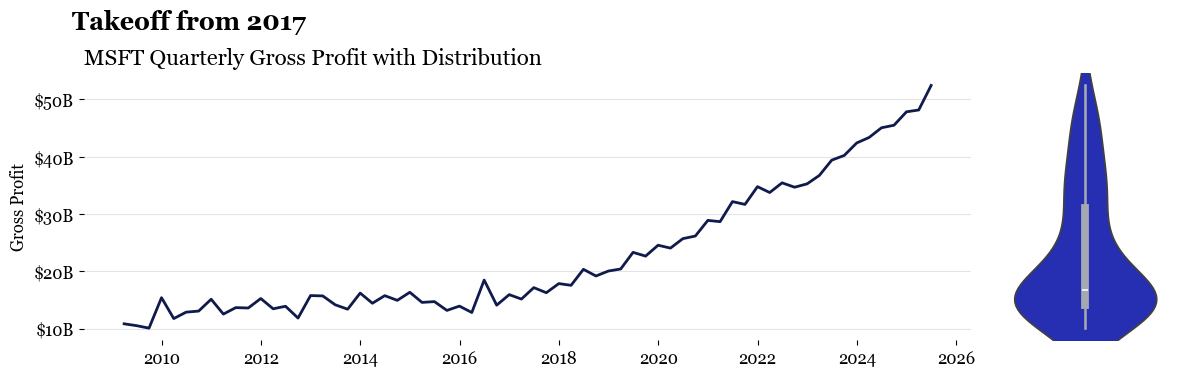

In [234]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
plt.suptitle('Takeoff from 2017',
             x=0.067, y=0.94,
             ha='left', size=18,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['Gross_Profit'], color=juan_colors[0], linewidth=2)
ax0.set_title('MSFT Quarterly Gross Profit with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Gross Profit')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['Gross_Profit'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])

# Align the y-axis limits of both plots to ensure the grid aligns perfectly
ax1.set_ylim(ax0.get_ylim())

ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


Although there is not such a increase in the revenue slope, Gross Profit and EBITDA do have one, which tells us that they have been much more effective in operational terms over the last 7 years.

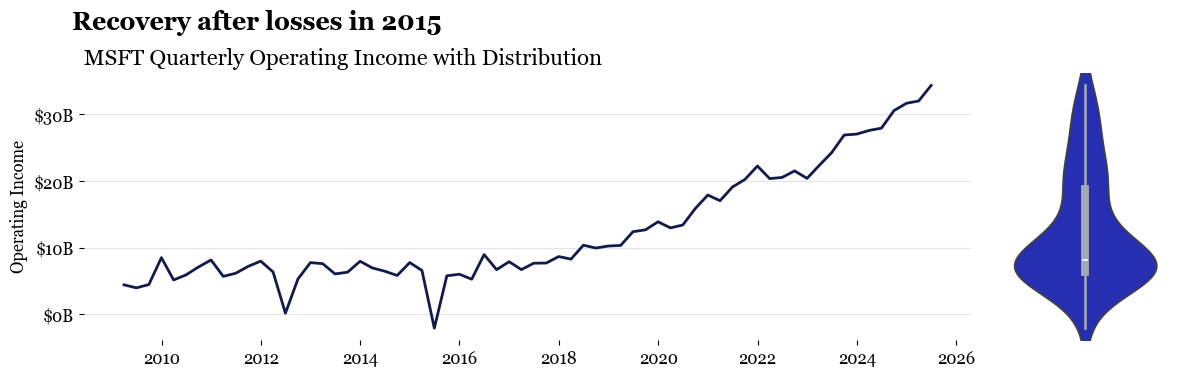

In [235]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
plt.suptitle('Recovery after losses in 2015',
             x=0.067, y=0.94,
             ha='left', size=18,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['Operating_Income'], color=juan_colors[0], linewidth=2)
ax0.set_title('MSFT Quarterly Operating Income with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Operating Income')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['Operating_Income'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])

# Align the y-axis limits of both plots to ensure the grid aligns perfectly
ax1.set_ylim(ax0.get_ylim())

ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

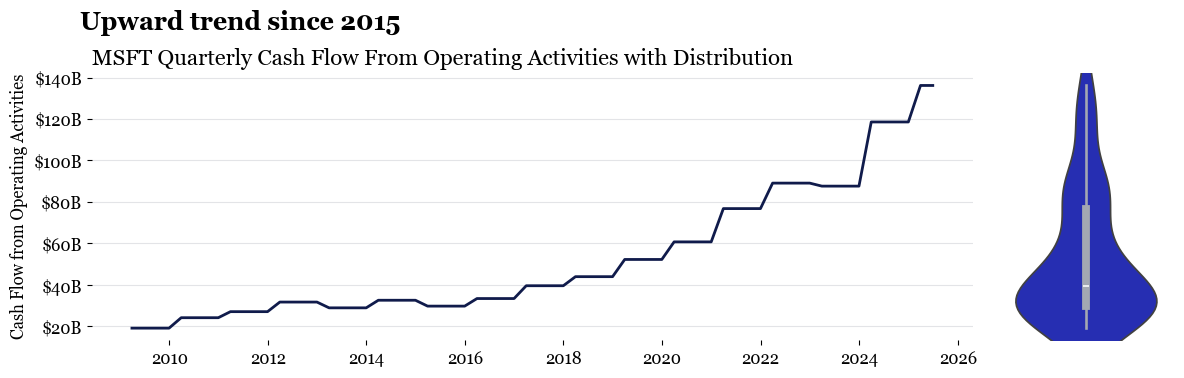

In [236]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
plt.suptitle('Upward trend since 2015',
             x=0.073, y=0.94,
             ha='left', size=18,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['Cash_Flow_From_Operating_Activities'], color=juan_colors[0], linewidth=2)
ax0.set_title('MSFT Quarterly Cash Flow From Operating Activities with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Cash Flow from Operating Activities')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['Cash_Flow_From_Operating_Activities'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])

# Align the y-axis limits of both plots to ensure the grid aligns perfectly
ax1.set_ylim(ax0.get_ylim())

ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

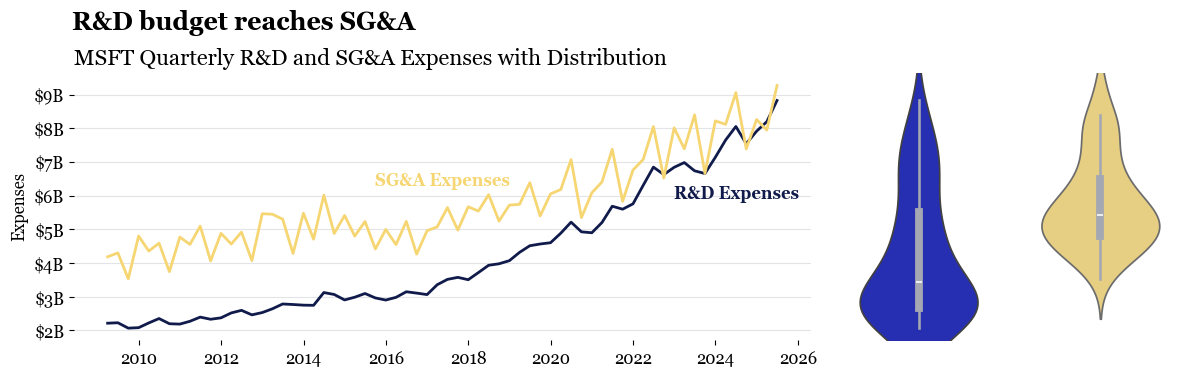

In [237]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 3, width_ratios=[5, 1, 1])
plt.suptitle('R&D budget reaches SG&A',
             x=0.067, y=0.94,
             ha='left', size=18,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)
ax2 = fig.add_subplot(gs[2])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['R&D_Expenses'], color=juan_colors[0], linewidth=2)
ax0.plot(df['Date'], df['SG&A_Expenses'], color=juan_colors[5], linewidth=2)
ax0.set_title('MSFT Quarterly R&D and SG&A Expenses with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Expenses')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)
ax0.text(df['Date'].iloc[10], df['R&D_Expenses'].iloc[10] - 0.8e9, 'R&D Expenses', 
         color=juan_colors[0], ha='left', va='center', fontsize=12, weight='bold')
ax0.text(df['Date'].iloc[39], df['SG&A_Expenses'].iloc[40] + 1.2e9, 'SG&A Expenses', 
         color=juan_colors[5], ha='left', va='center', fontsize=12, weight='bold')

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['R&D_Expenses'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])
ax1.set_ylim(ax0.get_ylim())
ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

sns.violinplot(y=df['SG&A_Expenses'], ax=ax2,
               color=juan_colors[5],
               inner='box')
for artist in ax2.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])
ax2.set_ylim(ax0.get_ylim())
ax2.set_ylabel('')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

We can see a big bet for R&D but controlling SG&A expenses. In some moments, in 2010, the SG&A expense double the R&D expense, until now that R&D Expenses equals SG&A expenses.

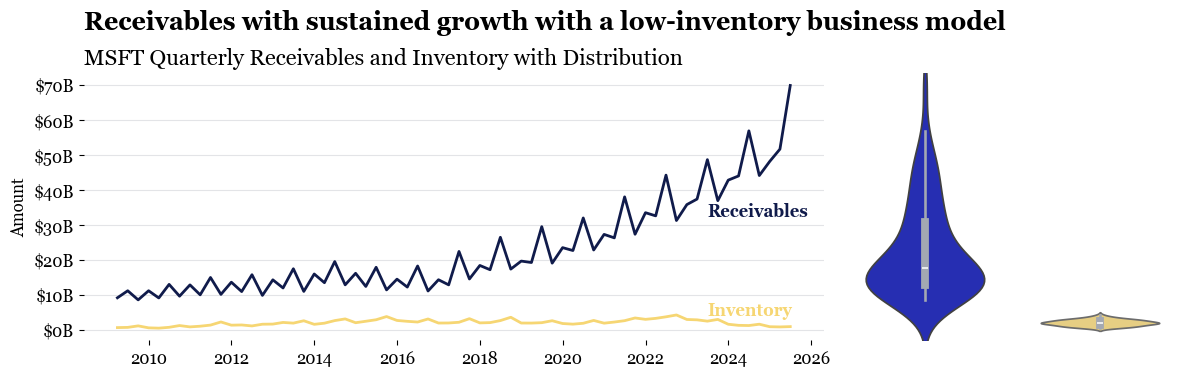

In [238]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 3, width_ratios=[5, 1, 1])
plt.suptitle('Receivables with sustained growth with a low-inventory business model',
             x=0.077, y=0.94,
             ha='left', size=18,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)
ax2 = fig.add_subplot(gs[2])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['Receivables'], color=juan_colors[0], linewidth=2)
ax0.plot(df['Date'], df['Inventory'], color=juan_colors[5], linewidth=2)
ax0.set_title('MSFT Quarterly Receivables and Inventory with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Amount')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)
ax0.text(df['Date'].iloc[8], df['Receivables'].iloc[8] - 15e9, 'Receivables', 
         color=juan_colors[0], ha='left', va='center', fontsize=12, weight='bold')
ax0.text(df['Date'].iloc[8], df['Inventory'].iloc[8] + 3e9, 'Inventory', 
         color=juan_colors[5], ha='left', va='center', fontsize=12, weight='bold')

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['Receivables'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])
ax1.set_ylim(ax0.get_ylim())
ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

sns.violinplot(y=df['Inventory'], ax=ax2,
               color=juan_colors[5],
               inner='box')
for artist in ax2.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])
ax2.set_ylim(ax0.get_ylim())
ax2.set_ylabel('')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

This shows us that MSFT's growth isn't directly linked to the increase in inventory, but rather to the increase in its accounts receivable. This is important in our analysis because we can see that inventory won't directly impact EBITDA.